In [1]:
import sys
# please insert the glycompare to the PATH
sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/glycompare/')

In [2]:
import os
from importlib import reload

import pandas as pd
import seaborn as sns

import json_utility
# import __init__
# import initiator
import glycan_io
import plot_glycan_utilities

import glypy
%matplotlib inline


### There is one file must required and two files optional:
    1. abundance_table.xls

    if external profile name rather than index
    2. external_profile_naming.json

    if has mz or hplz name other than glycan_id
    3. glycoprofile_name_to_glycan_id.json

### There are several parameter should be set up first
    1. working_addr : root working dir

    2. project_name: usually same as the folder of root

    3. __init__.num_processors: number of processes needed

    4. __init__.exact_Ture: False for topology; True for exact linkage matching

    5. complex_profile: True is every profile has unique glycans; False is every profile has same name
    6. complex_naming: use the mz or hplc naming rather than glytoucan_id in abundance table.
    7. external_profile_naming: each glycoprofile has complex name rather than index.
        complex_profile and outside_name helps charactorize how complex of the naming is

    8. structure_loader: for loading glytoucan id, could be:
        

In [3]:
import re


# setting

In [4]:
glypy2mk = {'GlcNAc': 'bNG',
            'adMan': 'aM',
            'bdMan': 'bM',
            'Fuc': 'aF',
            'Neu5Ac': 'aNN',
            'Gal': 'bA',}
glypy2pos = {'GlcNAc': 1,
          'adMan': 1,
          'bdMan': 1,
          'Fuc': 1,
          'Neu5Ac': 2,
          'Gal': 1}

mk2glypy = {'aF': 'Fuc',
 'aM': 'adMan',
 'aNN': 'Neu5Ac',
 'bA': 'Gal',
 'bM': 'bdMan',
 'bNG': 'GlcNAc'}

monosaccharides_dic = glypy.monosaccharides

# Copy from glypy
https://github.com/mobiusklein/glypy/blob/master/docs/Quickstart.ipynb

In [59]:
# glcnac1 = monosaccharides_dic["GlcNAc"]
# glcnac2 = monosaccharides_dic["GlcNAc"]

# glcnac1.add_monosaccharide(glcnac2, position=4, child_position=1)
# bdman = monosaccharides["bdMan"]
# glcnac2.add_monosaccharide(bdman, position=4, child_position=1)
# adman1 = monosaccharides["adMan"]
# bdman.add_monosaccharide(adman1, position=3, child_position=1)
# adman2 = monosaccharides["adMan"]
# bdman.add_monosaccharide(adman2, position=6, child_position=1)

# n_linked_core = glypy.Glycan(root=glcnac1)
# n_linked_core.reindex(hard=True)
# n_linked_core.canonicalize()
# print(n_linked_core)
# print(n_linked_core.mass())
# print(n_linked_core.total_composition())

In [17]:
type(monosaccharides_dic["bdMan"])

glypy.structure.monosaccharide.Monosaccharide

In [106]:
glypy.monosaccharides["GlcNac"]

RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n

In [5]:
def translate_mkov2glypy(temp_str, test_mode=False):
    mono_re = re.compile(r"(?P<position>[2-6])(?P<mono_mkv>[a-z][A-Z]+)")
    braket_degree=0
    temp_str=temp_str[::-1]
    glycan_list = []
    degree_list = []
    group_list = []
    while len(temp_str) != 0:
        if test_mode:
            print(temp_str[::-1])
        if temp_str[:5] == "nsA;)":
            temp_str=temp_str[5:]
        elif temp_str[:2] == "NG":
            glycan_list.append((glypy.monosaccharides["GlcNac"], -1))
            degree_list.append(braket_degree)
            temp_str=temp_str[2:]
        elif temp_str[0] == ")":
            braket_degree+=1
    #         group_category = max(degree_list)+1
            temp_str=temp_str[1:]
        elif temp_str[0] =="(":

    #         group_category=
            temp_str=temp_str[1:]
            #合并同类项
            i=len(degree_list)-1
#             print(i)
#             print(len(degree_list), len(degree_list))
            while degree_list[i-1] == braket_degree and i>1:
                if test_mode:  
                    print(glycan_list[i-1][0])
                    print(glycan_list[i][0])
    #             glycan_list[i-1][0]
    #             if glycan_list[i][0]
                glycan_list[i-1][0].add_monosaccharide(glycan_list[i][0], 
                                                       position=glycan_list[i][1], 
                                                       child_position=glycan_list[i][2])
                degree_list.pop()
                glycan_list.pop()
                i-=1
            glycan_list[i-1][0].add_monosaccharide(glycan_list[i][0], 
                                                   position=glycan_list[i][1], 
                                                   child_position=glycan_list[i][2])
            degree_list.pop()
            glycan_list.pop()
            braket_degree-=1
        elif mono_re.match(temp_str):
            _match = mono_re.match(temp_str)
            temp_str = temp_str[_match.end():]
            glycan_list.append((glypy.monosaccharides[mk2glypy[_match.group('mono_mkv')]], 
                                int(_match.group('position')),
                                int(glypy2pos[mk2glypy[_match.group('mono_mkv')]])))
            degree_list.append(braket_degree)
        else:
            print("?", temp_str[:5])
            break
    plot_glycan_utilities.plot_glycan(glypy.Glycan(root=glycan_list[0][0]))

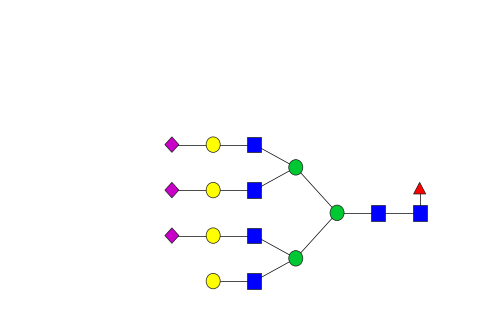

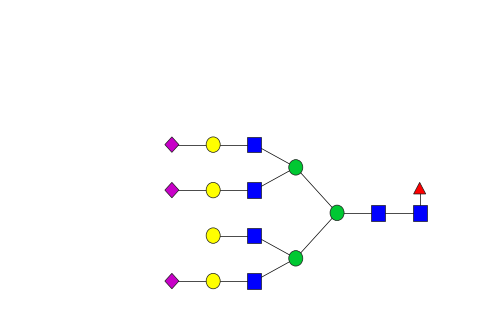

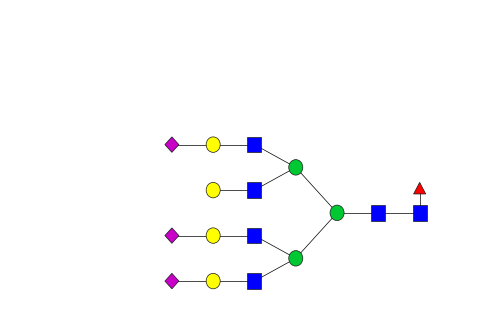

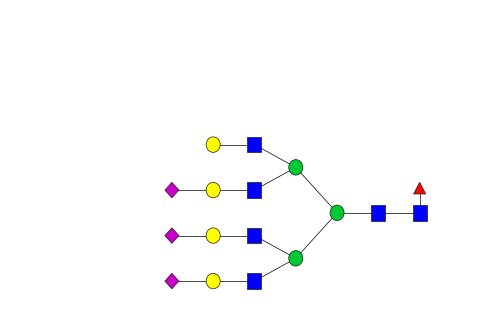

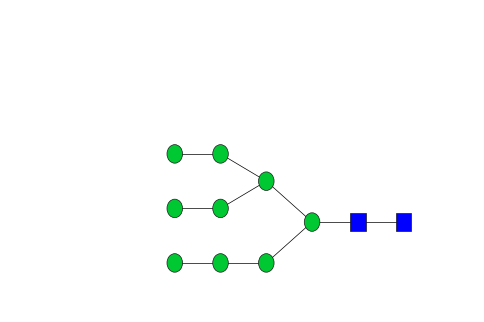

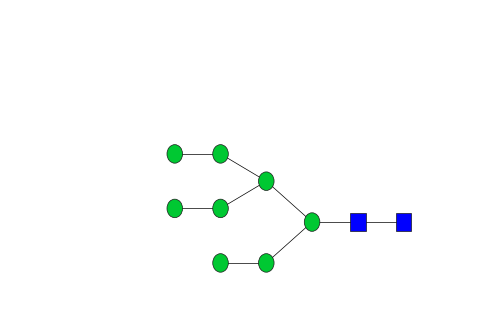

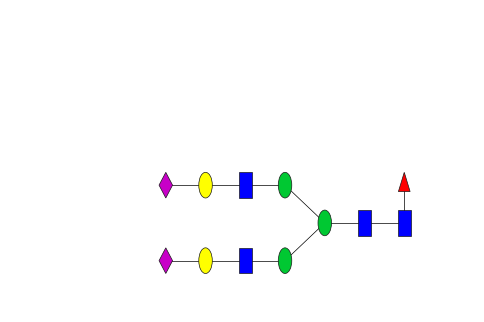

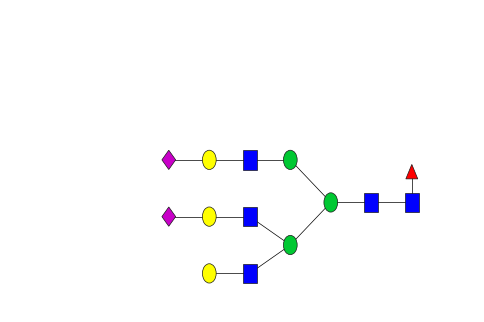

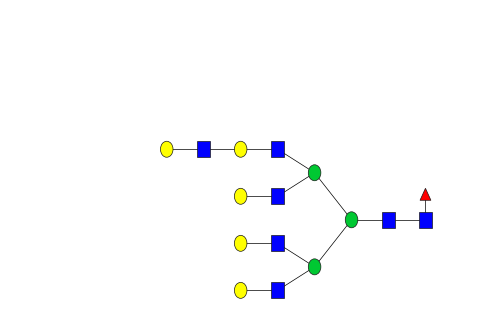

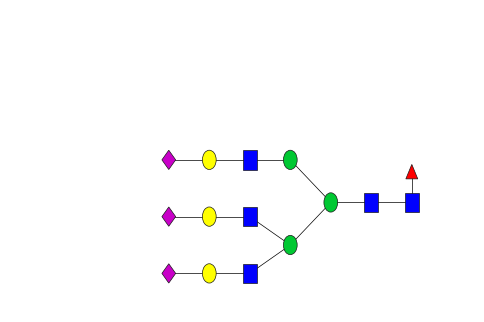

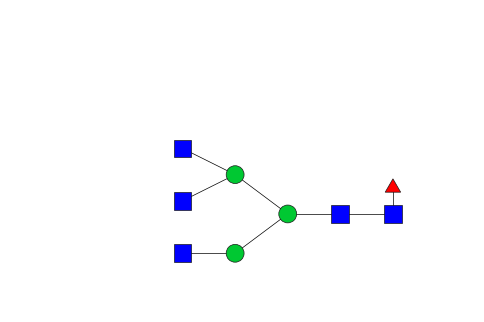

In [6]:
translate_mkov2glypy(temp_str="(Ab4GNb2(NNa3Ab4GNb4)Ma3(NNa3Ab4GNb2(NNa3Ab4GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(NNa3Ab4GNb2(Ab4GNb4)Ma3(NNa3Ab4GNb2(NNa3Ab4GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(NNa3Ab4GNb2(NNa3Ab4GNb4)Ma3(Ab4GNb2(NNa3Ab4GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(NNa3Ab4GNb2(NNa3Ab4GNb4)Ma3(NNa3Ab4GNb2(Ab4GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN);Asn")
translate_mkov2glypy(temp_str="(Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN);Asn")
translate_mkov2glypy(temp_str="(NNa3Ab4GNb2Ma3(NNa3Ab4GNb2Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(Ab4GNb2(NNa3Ab4GNb4)Ma3(NNa3Ab4GNb2Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(Ab4GNb2(Ab4GNb4)Ma3(Ab4GNb2(Ab4GNb3Ab4GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(NNa3Ab4GNb2(NNa3Ab4GNb4)Ma3(NNa3Ab4GNb2Ma6)Mb4GNb4(Fa6)GN);Asn")
translate_mkov2glypy(temp_str="(GNb2Ma3(GNb2(GNb6)Ma6)Mb4GNb4(Fa6)GN);Asn")
